# You made it!

In this notebook we'll explain the highlights system, but first a bit of orientation...

This is a typical, if not a bit short notebook for a sample.

In the cell below, we import a bunch of useful dependencies and then we also import the magical `project` object from our `project.py`.

We want to tell cassini that this notebook belongs to `WP1.1b`, so we run the line:

    smpl = project.env('WP1.1b')

This also fetches the `WP1.1b` sample object.

We then use `smpl.gui.header()` to display a helpful header widget. This is just a convenient place to also edit a tier's description and its children.

From this, you can see this tier has a child `DataSet` called `WP1.1b-Images`. 

Because `DataSet`s don't have notebooks, clicking `open` will open your OS's file browser into the `DataSet`'s folder. (_if you're just viewing this notebook in binder this won't work!_)

This is incredibly handy, because you can just click that button and then dump your data into the folder.

In this case, the data in `WP1.1b-Images` is a file called `bread-again.jpg`.

Typically we might want to perform some analysis on some data with the resulting plots etc. being the important _highlights_ of that analysis.

Scroll past the header to see how we grab that data!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from cas_project import project

smpl = project.env('WP1.1b')
smpl.gui.header()

`smpl` is the current `Sample` object:

In [9]:
smpl

<Sample "WP1.1b">

We can fetch children of `smpl` with the getitem syntax:

In [11]:
images = smpl['Images']
images

<DataSet "WP1.1b-Images">

Cassini is configured to work a bit like `pathlib.Path`s i.e. the divide syntax can be used to build paths:

In [14]:
images / 'bread-again.jpg'

WindowsPath('C:/Users/ramme/Documents/Programin/WorkingVersions/cassini/dev/binder/WorkPackages/WP1/WP1.1/Images/b/bread-again.jpg')

We can use this to very easily load our data from the right place:

In [15]:
data = Image.open(smpl['Images'] / 'bread-again.jpg')

Perhaps we then perform some analysis on this data and generate an important plot:

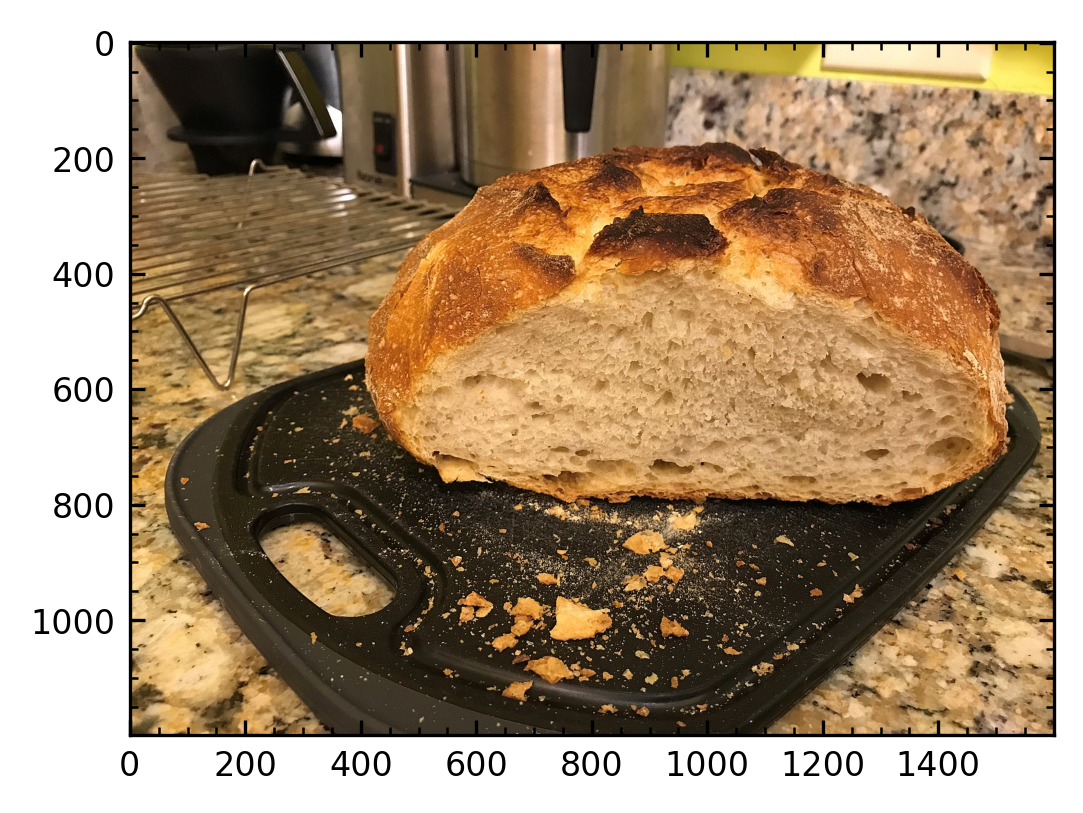

In [16]:
plt.imshow(data)

The highlight system work by using the `%%hlt` cell magic to mark the output of the cell as a highlight.

This goes in the first line of a cell (see below).

Cassini will then capture any outputs from running that cell and save a copy of them outside of the notebook. This allows them to be previewed from the cassini browser without running the notebook!

If you look at the syntax for the cell below.

We add a title to the highlight (in this case `Photo`) by add this after the `%%hlt` command.

    %%hlt Photo

We also can add a caption to the highlight by returning a string at the end of our cell:

    """
    Maybe overdone a bit. $\int_0^1 \sin(x)$
    """

Cassini also grabs this cell then renders it as markdown as part of the cell output.

## Photo

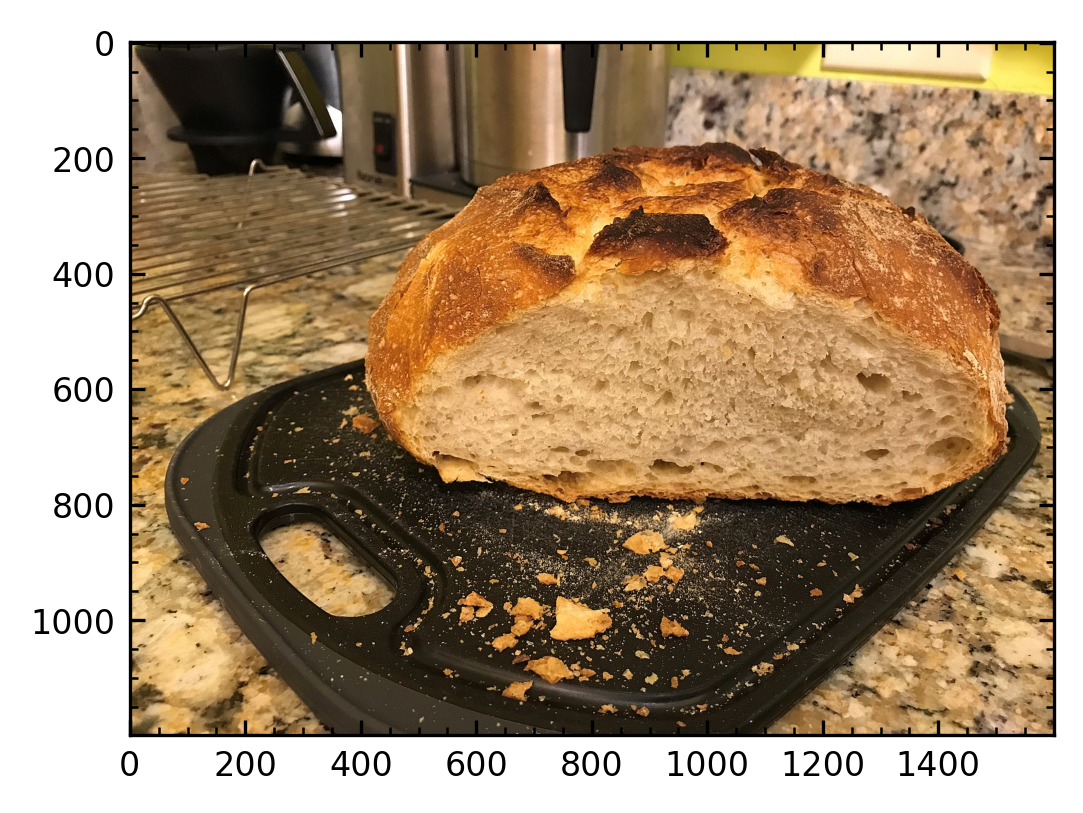


Maybe overdone a bit. $\int_0^1 \sin(x)$


In [21]:
%%hlt Photo

plt.imshow(data)

"""
Maybe overdone a bit. $\int_0^1 \sin(x)$
"""

## Adding a new highlight

Let's add a new highlight.

**Create a new cell below this and enter**:

    %%hlt sin(x)

    x = np.linspace(0, 10)
    plt.plot(x, np.sin(x))

    """
    This is wavey/ $\sin(x)$
    """

**then run the cell!**

Ok so that's the highlight system.

Now let's **navigate back to the browser, by clicking the tree browser button**:

![treeBrowser](../../../images/treeIcon.PNG)

In the cassini toolbar.

**Before you go! Once the browser has opened, drag this tab to join `Home` on the right panel to keep reading on!**

## Viewing your new highlight in the browser

You will find that the new highlight doesn't immediately appear in the browser.

This is because cassini isn't notified when the highlights change. Therefore you need to **click the fetch from disk button** to get it to reload:

![refresh](../../../images/fetchIcon.PNG)

# Meta and the children table

`DataSet`s can't have notebooks or meta, so they're not too interesting to view in the children table, so **click the final `1` in `🏠 / 1 / 1`**.

Here we can see all the children of `WP1.1` including `WP1.1b`.

In the Meta section of `WP1.1b` we can see it has a `cook_time` of `12`. 

If we have many samples, it may be helpful to compare their `cook_time`s.

Luckily, this can be done!

Just **click the edit columns icon in the table**:

![editColumnsIcons](../../../images/editColumnsIcon.PNG)

and any meta names any children have will appear hear.

Selecting them will add a column to the table for that meta name.

So **try adding `cook_time` to the column**.

Here it's evident that it would be helpful if _all_ children of `WP1.1` have a `cook_time`. 

To help facilitate this, when you create a new child, it will prompt you for initial values for any meta found in the existing children.

**click the create children button!**

![editColumnsIcons](../../../images/newChildIcon.PNG)

Along with a bunch of other values, it should prompt you for a value of `cook_time`!

# Templates

You will see it also asks you to select a template for creating the new `Sample`.

Templates live in the `templates` folder found in the home directory

In the regular file browser (far left), **click the folder button** to head to the home directory and **open the `templates` folder**.

You should find there's a folder for:

* Experiment
* Home
* Sample
* WorkPackage

**Open the sample folder**.

Here you'll find the default template `Sample.tmpl.ipynb` and the `Cooking.ipynb` template you probably saw in the new Sample dialogue.

You are free to create as many templates as you want in this directory and they will be available from the appropriate new child dialogue.

**Open the `Cooking.ipynb` template.**

Cassini uses the [Jinja](https://jinja.palletsprojects.com/en/3.0.x/) template engine.

This is a super powerful tool.

In short sections with `{{ something }}` are evaluated as code and filled in with the output.

When you create a new child, `cassini` passes the newly created child object as `tier` to Jinja so attributes like `tier.name` can be accessed and filled in by Jinja.

This also includes meta values you enter in the new child dialogue, hence:

    {{ tier.meta['cook_time'] }}

Will fill in with any cook time you entered in the dialogue.

You can use templates to help standardise proceedures, anaylsis etc.

Ok now you have a good idea of how to use notebooks for analysing and summarising data.

Next we'll see how Cassini can help make writing reports/ making figures easier.

**In the File browser to the left, navigate back to the top level and to**:

[Reports/NaturePaper.ipynb](../../../Reports/NaturePaper.ipynb)